In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('C:\\Users\\Dell\\Downloads\\Churn_Modelling (1).csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
df.drop(columns = ["RowNumber","CustomerId", "Surname"], inplace = True)

In [10]:
df.head(4)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0


In [11]:
df = pd.get_dummies(df,columns=["Geography", "Gender"],drop_first= True)

In [12]:
df = df.astype(int)

In [13]:
df.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


In [14]:
X = df.drop(columns= ['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size =0.2, random_state = 10)

In [15]:
X_test.shape

(2000, 11)

In [16]:
y_test.shape

(2000,)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
X_train_scaled

array([[ 1.78974378,  0.94394225,  1.04271518, ...,  1.73436329,
        -0.57388614,  0.91255717],
       [ 0.26040483,  2.35932486, -0.35053238, ..., -0.57658047,
         1.74250594, -1.09582175],
       [-0.22526362, -0.47144036,  0.3460914 , ..., -0.57658047,
         1.74250594,  0.91255717],
       ...,
       [-1.97160337,  0.09471269,  0.3460914 , ...,  1.73436329,
        -0.57388614, -1.09582175],
       [ 0.60140608, -0.47144036, -1.04715616, ..., -0.57658047,
        -0.57388614, -1.09582175],
       [ 0.21907135,  0.09471269,  1.73933896, ...,  1.73436329,
        -0.57388614,  0.91255717]])

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [101]:
model = Sequential()
model.add(Dense(11, activation = 'relu', input_dim = 11)),
model.add(Dense(7,activation = 'relu')),
model.add(Dense(1,activation = 'sigmoid'))

In [102]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 11)                132       
                                                                 
 dense_13 (Dense)            (None, 7)                 84        
                                                                 
 dense_14 (Dense)            (None, 1)                 8         
                                                                 
Total params: 224 (896.00 Byte)
Trainable params: 224 (896.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [103]:
model.compile(loss ='binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [104]:
hist = model.fit(X_train_scaled, y_train, epochs = 50, validation_split = 0.2)

Epoch 1/50
200/200 [==============================] - 3s 6ms/step - loss: 0.5321 - accuracy: 0.7619 - val_loss: 0.4419 - val_accuracy: 0.8194
Epoch 2/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4357 - accuracy: 0.8141 - val_loss: 0.4129 - val_accuracy: 0.8244
Epoch 3/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4093 - accuracy: 0.8309 - val_loss: 0.3941 - val_accuracy: 0.8344
Epoch 4/50
200/200 [==============================] - 1s 4ms/step - loss: 0.3894 - accuracy: 0.8422 - val_loss: 0.3797 - val_accuracy: 0.8406
Epoch 5/50
200/200 [==============================] - 1s 4ms/step - loss: 0.3731 - accuracy: 0.8498 - val_loss: 0.3693 - val_accuracy: 0.8456
Epoch 6/50
200/200 [==============================] - 1s 4ms/step - loss: 0.3613 - accuracy: 0.8527 - val_loss: 0.3613 - val_accuracy: 0.8456
Epoch 7/50
200/200 [==============================] - 1s 4ms/step - loss: 0.3532 - accuracy: 0.8591 - val_loss: 0.3548 - val_accuracy: 0.8550
Epoch 

In [105]:
model.evaluate(X_train_scaled, y_train)

250/250 [==============================] - 1s 3ms/step - loss: 0.3219 - accuracy: 0.8652


[0.3218916952610016, 0.8652499914169312]

In [106]:
model.layers[2].get_weights()

[array([[ 0.9267394 ],
        [ 0.6486236 ],
        [-0.9690056 ],
        [-0.44603348],
        [-0.46500957],
        [ 0.9517501 ],
        [-1.5390297 ]], dtype=float32),
 array([-0.10424481], dtype=float32)]

In [107]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 3ms/step


In [108]:
y_pred = np.where(y_log>0.5,1,0)

In [109]:
y_pred[0]

array([0])

In [110]:
 from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8495

In [111]:
import matplotlib.pyplot as plt

In [112]:
hist.history

{'loss': [0.5320703387260437,
  0.4356796145439148,
  0.4093344509601593,
  0.3894289433956146,
  0.3731057643890381,
  0.36127418279647827,
  0.35318365693092346,
  0.3480985760688782,
  0.3445761799812317,
  0.3414798676967621,
  0.3391670286655426,
  0.33786648511886597,
  0.336711049079895,
  0.3352852165699005,
  0.33472079038619995,
  0.3336560130119324,
  0.33273088932037354,
  0.332314133644104,
  0.3315606713294983,
  0.33080390095710754,
  0.33004069328308105,
  0.33013373613357544,
  0.3289710283279419,
  0.3286276161670685,
  0.3281051218509674,
  0.3276779055595398,
  0.32695308327674866,
  0.3267025649547577,
  0.32592159509658813,
  0.325754851102829,
  0.32525917887687683,
  0.3250803053379059,
  0.3245221972465515,
  0.32414841651916504,
  0.3235262334346771,
  0.3235121965408325,
  0.3233518600463867,
  0.32317692041397095,
  0.3224572241306305,
  0.3222670257091522,
  0.32200339436531067,
  0.3224303126335144,
  0.32085421681404114,
  0.32155516743659973,
  0.3212572

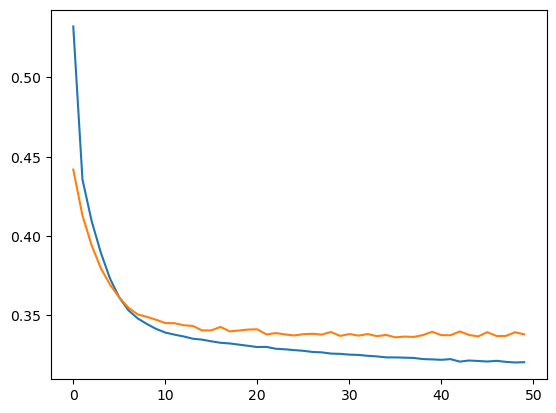

In [113]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

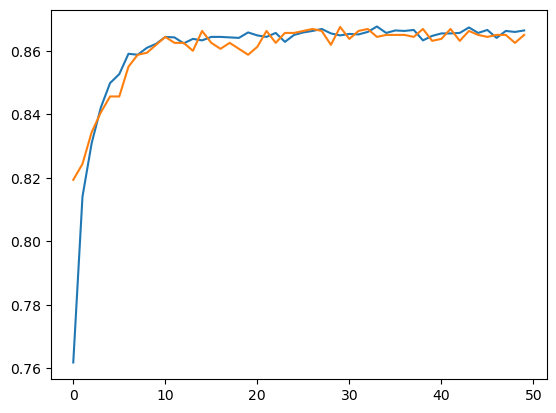

In [114]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])